In [1]:
#Importing the necessary modules
import tensorflow as tf
from keras.applications.vgg16 import VGG16 #VGG16 pretrained on ImageNet will be imported
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input, Lambda ,Dense ,Flatten , Dropout , GlobalAveragePooling2D

In [2]:
#vgg 16 model
classifier_vgg16 = VGG16(input_shape= (224,224,3),include_top=False,weights='imagenet') #initiate model with 224x224x3 input size
#not train top layers
for layer in classifier_vgg16.layers:
    layer.trainable = False #freeze the top layers
classifier_vgg16.summary() #print summary

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# #not train top layers
# for layer in classifier_vgg16.layers:
#     layer.trainable = False

In [3]:
#adding extra layers for our classes (15 in our case)
main_model = classifier_vgg16.output #get output from VGG-16
main_model = GlobalAveragePooling2D()(main_model) #Add global average pooling layer
main_model = Dense(512,activation='relu')(main_model) #add 512 neurons fully connected layer 
main_model = Dense(256,activation='relu')(main_model) #add 256 neurons fully connected layer 
main_model = Dropout(0.5)(main_model) #dropout to reduce overfitting
main_model = Dense(15,activation='softmax')(main_model) #final layer with 15 neurons to reconnize the subjects

In [4]:
#compiling
model = Model(inputs = classifier_vgg16.input , outputs = main_model) #define model
model.summary() #print summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #compile with ADAM and Categorical Cross Entropy

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generate batches of images for training and testing

#use the image data generator to import the images from the dataset
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
#setting the train and testing images paths
train_path = 'C://Users//user//Desktop//Infento//Project 3. Face Recognition//dataset_cnn//train//' 
test_path = 'C://Users//user//Desktop//Infento//Project 3. Face Recognition//dataset_cnn//test//'
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=2,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224, 224),
                                            batch_size=2,
                                            class_mode='categorical',
                                            shuffle=False)

Found 120 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


In [10]:
#fit the model
#it will take some time to train
nb_train_samples=120
nb_validation_samples=45
batch_size=2
steps_per_epoch = len(training_set)//batch_size #num of epochs

#fit the model
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=50,
                              steps_per_epoch=nb_train_samples // batch_size,
                              validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
60/60 [==============================] - 61s 1s/step - loss: 2.5834 - accuracy: 0.2167 - val_loss: 2.3876 - val_accuracy: 0.2955
Epoch 2/50
60/60 [==============================] - 58s 963ms/step - loss: 2.4406 - accuracy: 0.2583 - val_loss: 2.2220 - val_accuracy: 0.4318
Epoch 3/50
60/60 [==============================] - 55s 929ms/step - loss: 2.2484 - accuracy: 0.2583 - val_loss: 1.9392 - val_accuracy: 0.4318
Epoch 4/50
60/60 [==============================] - 53s 890ms/step - loss: 1.9865 - accuracy: 0.3667 - val_loss: 1.6735 - val_accuracy: 0.3864
Epoch 5/50
60/60 [==============================] - 53s 880ms/step - loss: 1.8884 - accuracy: 0.4000 - val_loss: 1.6784 - val_accuracy: 0.4091
Epoch 6/50
60/60 [==============================] - 55s 928ms/step - loss: 1.7060 - accuracy: 0.4167 - val_loss: 1.3417 - val_accuracy: 0.6818
Epoch 7/50
60/60 [==============================] - 55s 920ms/step - loss: 1.5564 - accuracy: 0.5000 - val_loss: 1.2060 - val_accuracy: 0.7727
Ep

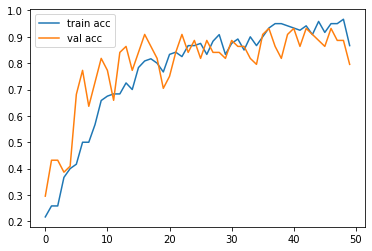

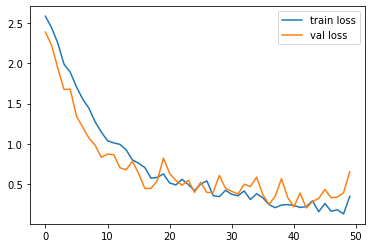

In [11]:
#PLOTTING accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , label = 'train acc')
plt.plot(history.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()

#PLOTTING loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()